<a href="https://colab.research.google.com/github/SanBartolome/IA-diploma-course-2021/blob/main/ACO_TSP_(DESAFIO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización industrial con Computación Evolutiva 
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)
Dra. Soledad Espezua Llerena (sespezua@pucp.edu.pe )

## DESAFIO: Algoritmo Ant Colony Optimization (ACO) para resolver el problema del cajero viajante

En este notebook se presenta la implementación del algoritmo de colonia de hormigas para encontrar rutas optimas para el problema del cajero viajante. La clase que implementa el algoritmo es ACO_TSP. Se debe proporcionar al constructor una matriz de costos entre nodos, asi como parametros del algoritmo ACO 

<b>Al final se encuentra el desafio planteado</b>


In [1]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice


class ACO_TSP(object):
    
    def __init__(self, cost_matrix, num_ants, num_elite_ants, max_iter, rho=0.95, alpha=1, beta=1):
        """
        Argumentos:
            cost_matrix: Matriz de costos ((2D numpy.array)). La diagonal se asume np.inf.
            num_ants: Numero de hormigas
            num_elite_ants: Numero de mejores hormigas habilitadas a depositar feromonas
            max_iter: Maximo numero de iteraciones
            rho: Factor de evaporacion. Valor 1 significa evaporacion total en una iteracion
            alpha: exponente del rastro de feromona
            beta:  exponente de la facilidad de transicion
        Example:
            ant_colony = ACO_TSP(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.cost_matrix  = cost_matrix
        self.pheromone_matrix = np.ones(self.cost_matrix.shape) / len(cost_matrix)
        self.num_ants = num_ants
        self.num_elite_ants = num_elite_ants
        self.max_iter = max_iter
        self.rho = rho
        self.alpha = alpha
        self.beta = beta

    ## Metodo principal que realiza la optimizacion ACO en un problema TSP
    def optimize(self):
        best_tour = None   # el mejor tour de la iteracion
        best_tour_alltime = ("placeholder", np.inf)  # para almacenar el mejor tour encontrado hasta ahora
        
        for i in range(self.max_iter):   # por cada iteracion
            ant_tours = self.find_ant_tours()   # encuentra los tours de todas hormigas
            self.deposit_pheronome(ant_tours, self.num_elite_ants)  # deposita feromonas en los tours de las hormigas elite
            best_tour = min(ant_tours, key=lambda x: x[1])   # devuelve el camino menos costoso
            print (best_tour)
            if best_tour[1] < best_tour_alltime[1]:
                best_tour_alltime = best_tour            
            self.pheromone_matrix = self.pheromone_matrix * (1-self.rho) # evapora las feromonas
        return best_tour_alltime   # retorna el mejor camino encontrado en toda la optimizacion

    ## Deposita feromonio en buenos caminos
    def deposit_pheronome(self, ant_tours, num_elite_ants): 
        sorted_tours = sorted(ant_tours, key=lambda x: x[1])  # ordena los tours por su costo
        for tour, tour_cost in sorted_tours[:num_elite_ants]: # por cada tour de una hormiga de elite
            for edge in tour:   # por cada arco del tour de una hormiga de elite
                self.pheromone_matrix[edge] += 1.0 / self.cost_matrix[edge] # deposita feromonio en el arco

    ## Obtiene el costo de un tour
    def get_tour_cost(self, tour):
        tour_cost = 0.0
        for edge in tour:
            tour_cost += self.cost_matrix[edge]
        return tour_cost

    ## Encuentra tours de las hormiga
    def find_ant_tours(self):
        ant_tours = []
        for i in range(self.num_ants):  # por cada hormiga
            tour = self.make_ant_tour(0) # obtiene el tour de hormiga i empezando en nodo 0
            ant_tours.append( (tour, self.get_tour_cost(tour)) )
        return ant_tours
    
    ## Explora un tour para una hormiga
    def make_ant_tour(self, start_node):
        tour = []
        visited_nodes = set()   # para almacenar los nodos visitados
        visited_nodes.add(start_node)
        current_node = start_node
        for i in range(len(self.cost_matrix) - 1):  # para cada arista del camino a construir
            next_node = self.pick_next_node( current_node, visited_nodes ) # escoge un nodo a saltar
            tour.append( (current_node, next_node) )
            current_node = next_node
            visited_nodes.add(next_node)
        tour.append((current_node, start_node)) # coloca la ultima arista hasta el nodo inicial para cerrar el camino    
        return tour

    ## Escoje el nodo siguiente desde el nodo actual (node) basado en probabilidades ACO
    def pick_next_node(self, node, visited):
        
        cost_row      = self.cost_matrix[node]   # obtiene los costos de saltar a cada nodo desde node
        pheromone_row = np.copy(self.pheromone_matrix[node]) # obtiene las feromonas de cada arista desde node
        pheromone_row[list(visited)] = 0    # las aristas a los nodos ya visitados son inhabilitadas colocando feromona 0 

        # calcula probabilidades de aristas
        prob_row = pheromone_row ** self.alpha * (( 1.0 / cost_row) ** self.beta)
        prob_row = prob_row / prob_row.sum()     

        nodes = range(len(self.cost_matrix))
        next_node = np_choice(nodes, 1, p=prob_row)[0]   # escoje el siguiente nodo segun las probabilidades (ruleta)
        
        return next_node
    


## Probando el algoritmo

 ACO en un problema simulado de 5 nodos

In [2]:
costos = np.array([[np.inf, 2, 2, 5, 7],
                      [2, np.inf, 4, 8, 2],
                      [2, 4, np.inf, 1, 3],
                      [5, 8, 1, np.inf, 2],
                      [7, 2, 3, 2, np.inf]])

aco = ACO_TSP(costos, 3, 1, 10, rho=0.95, alpha=1, beta=1)
camino_aco = aco.optimize()
print ("Tour encontrado por ACO: {}".format(camino_aco))

([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
Tour encontrado por ACO: ([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)



 ACO en un problema simulado de 20 nodos

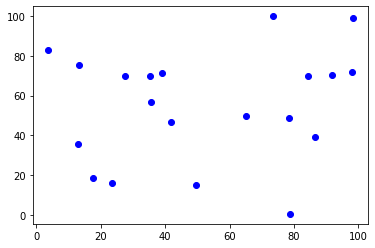

In [9]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
N= 20
puntos = 100*np.random.random((N,2))
dist_matrix = distance.cdist(puntos, puntos)
for i in range(N):  dist_matrix[i,i] = np.inf
#print (dist_matrix) 
plt.plot(puntos[:,0], puntos[:,1], 'o', color='blue')
plt.show()

In [10]:
print (puntos) 

[[97.9810679  72.02921301]
 [49.64151158 15.0497582 ]
 [65.01308431 49.97831041]
 [98.19850113 98.98669876]
 [84.39924518 69.5954877 ]
 [35.23919854 69.68407901]
 [41.74467866 46.70182343]
 [78.6199663   0.49284144]
 [17.50314891 18.76393784]
 [ 3.78979806 82.85881209]
 [39.05506498 71.51799799]
 [13.00309453 35.83070569]
 [23.49508194 16.11131739]
 [35.7426268  56.88608744]
 [91.81893469 70.56261243]
 [86.59680634 39.33051903]
 [78.41897047 48.96887767]
 [73.43085454 99.88664695]
 [27.62230738 69.8009692 ]
 [13.1709425  75.34778435]]


In [11]:
aco = ACO_TSP(dist_matrix, 100, 50, 100, rho=0.5, alpha=1, beta=1)
camino_aco = aco.optimize()
print ("Tour encontrado por ACO: {}".format(camino_aco))

([(0, 14), (14, 3), (3, 17), (17, 7), (7, 15), (15, 2), (2, 6), (6, 9), (9, 19), (19, 18), (18, 13), (13, 11), (11, 12), (12, 8), (8, 1), (1, 5), (5, 10), (10, 16), (16, 4), (4, 0)], 575.7712884405728)
([(0, 14), (14, 4), (4, 16), (16, 15), (15, 2), (2, 6), (6, 13), (13, 18), (18, 5), (5, 10), (10, 19), (19, 9), (9, 8), (8, 12), (12, 11), (11, 1), (1, 7), (7, 17), (17, 3), (3, 0)], 492.8675001699413)
([(0, 14), (14, 4), (4, 15), (15, 16), (16, 6), (6, 13), (13, 10), (10, 5), (5, 18), (18, 19), (19, 9), (9, 11), (11, 12), (12, 8), (8, 1), (1, 7), (7, 2), (2, 17), (17, 3), (3, 0)], 454.9887162396228)
([(0, 14), (14, 4), (4, 3), (3, 17), (17, 9), (9, 19), (19, 18), (18, 10), (10, 5), (5, 13), (13, 6), (6, 11), (11, 8), (8, 12), (12, 1), (1, 7), (7, 15), (15, 16), (16, 2), (2, 0)], 429.60748272157275)
([(0, 14), (14, 4), (4, 16), (16, 2), (2, 6), (6, 13), (13, 10), (10, 5), (5, 18), (18, 19), (19, 9), (9, 11), (11, 8), (8, 12), (12, 1), (1, 7), (7, 15), (15, 17), (17, 3), (3, 0)], 422.4901

## Desafio:

* Hacer una funcion para graficar un tour pasado 

* Probar ACO en el ejemplo anterior variando el factor de evaporación rho={0.1, 0.5, 0.95}, alpha=1, beta=1. Analizar los resultados en base a promedios de 10 ejecuciones para cada rho


In [6]:
def plotPath(list):
  x_val = [x[0] for x in list]
  y_val = [x[1] for x in list]
  plt.plot(x_val,y_val)
  plt.plot(x_val,y_val,'or')
  plt.show()

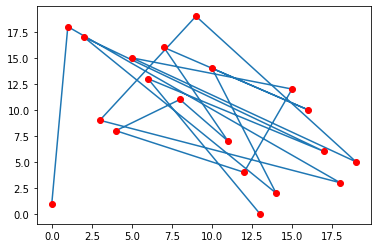

In [7]:
plotPath(camino_aco[0])

In [12]:
rhos = {0.1, 0.5, 0.95}
total_aco = []
index = 0
for r in rhos:
  total_aco.append([])
  for lap in range(10):
    aco = ACO_TSP(dist_matrix, 100, 50, 100, rho=r, alpha=1, beta=1)
    camino_aco = aco.optimize()
    total_aco[index].append(camino_aco[1])
  index = index + 1

([(0, 4), (4, 10), (10, 18), (18, 5), (5, 2), (2, 11), (11, 13), (13, 6), (6, 9), (9, 19), (19, 12), (12, 8), (8, 1), (1, 16), (16, 15), (15, 7), (7, 14), (14, 3), (3, 17), (17, 0)], 633.3698436621187)
([(0, 14), (14, 4), (4, 16), (16, 15), (15, 2), (2, 10), (10, 5), (5, 13), (13, 18), (18, 9), (9, 19), (19, 11), (11, 8), (8, 12), (12, 6), (6, 7), (7, 1), (1, 17), (17, 3), (3, 0)], 507.961905639716)
([(0, 14), (14, 4), (4, 3), (3, 17), (17, 19), (19, 9), (9, 18), (18, 5), (5, 10), (10, 2), (2, 6), (6, 13), (13, 11), (11, 8), (8, 12), (12, 1), (1, 7), (7, 15), (15, 16), (16, 0)], 452.5485655044986)
([(0, 14), (14, 4), (4, 16), (16, 15), (15, 7), (7, 1), (1, 12), (12, 8), (8, 11), (11, 9), (9, 19), (19, 18), (18, 10), (10, 5), (5, 13), (13, 6), (6, 2), (2, 17), (17, 3), (3, 0)], 412.07787038901756)
([(0, 14), (14, 4), (4, 16), (16, 2), (2, 6), (6, 13), (13, 5), (5, 10), (10, 18), (18, 19), (19, 9), (9, 11), (11, 8), (8, 12), (12, 1), (1, 7), (7, 15), (15, 17), (17, 3), (3, 0)], 424.23910

In [13]:
for idx, partial_total in enumerate(total_aco, start = 1):
  print('Combinación ', idx)
  partial = np.array(partial_total)
  print('Media: ', partial.mean())
  print('Desviación estándar: ', partial.std())

Combinación  1
Media:  410.00043874706296
Desviación estándar:  0.8791301544420212
Combinación  2
Media:  411.6755935692302
Desviación estándar:  3.254997584623934
Combinación  3
Media:  412.24765196118517
Desviación estándar:  4.250127302155357


El tener un factor de evaporación mayor permite que se considere menos las decisiones pobres pasadas.